## Import

In [1]:
import pandas as pd 
import numpy as np
import re 
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import *
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git
from wordcloud import WordCloud 
import demoji
import langid
import datetime
from datetime import datetime
from matplotlib.dates import drange 
from unidecode import unidecode
import gensim
import gensim.downloader as api
from gensim.models import keyedvectors
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel
from gensim import models
import os
from nltk.stem import WordNetLemmatizer
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer    #Bibliothéque FR pour la lemmatisation 
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', None)
import tweepy
import pyLDAvis.gensim_models

## Twitter Auth

In [2]:
%run ./Keys.ipynb

In [3]:
auth= tweepy.OAuth1UserHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

## Scrap

In [27]:
number_of_tweets = 500000
tweets = []
dates = []
usernames = []
hashtags = []

# Liste des noms d'utilisateur
screen_names = ["@ArthurB", "@VitalikButerin", "@cz_binance","@elonmusk","@justinsuntron","@Emurgo_Ken","@CryptoHayes","@brian_armstrong","@JedMcCaleb","@SatoshiLite","@bobbyong","@VladZamfir","@ethereumJoseph","@gavofyork","@iam_preethi","@el33th4xor","@evan_van_ness","@Maxime_D9","@0xstark","@coinbureau","@saylor",""]  # Remplacer par les noms d'utilisateur réels

# Parcourir la liste des noms d'utilisateur
for screen_name in screen_names:
    for i in tweepy.Cursor(api.user_timeline, screen_name=screen_name, tweet_mode='extended').items(number_of_tweets):
        tweets.append(i.full_text)
        dates.append(i.created_at)
        usernames.append(i.user.screen_name)
        hashtags.append([hashtag['text'] for hashtag in i.entities['hashtags']])

df = pd.DataFrame({'Date': dates, 'Username': usernames, 'tweets': tweets, 'Hashtags': hashtags})

df.head(10)


Rate limit reached. Sleeping for: 599
Rate limit reached. Sleeping for: 589


,Date,Username,tweets,Hashtags
0,2023-05-12 20:38:27+00:00,ArthurB,"@TheStalwart Rabbit hole. You can go utilitarian and swallow a belt feed of bullets, or you can swallow a single one which is that we care about others insofar as we empathize with them.",[]
1,2023-05-12 20:11:01+00:00,ArthurB,"@The_Half_Soul This has come up in design discussions. My take is that it's worth shipping v1 without it, since it's unlikely to have much consequences in the near term, and getting override done in the next upgrade if adaptive is activated.",[]
2,2023-05-12 20:06:13+00:00,ArthurB,"@The_Half_Soul There's a long overdue review of ""cycle invariants"" that will help clarify how many cycles we need to keep, how many we need to wait for delegation to happen etc. That should come first. Also, if adaptive inflation is activated, it also introduces a new type of possible override.",[]
3,2023-05-12 20:00:09+00:00,ArthurB,"@The_Half_Soul It's a good idea but\n- the best implementations would lengthen the voting cycle a bunch\n- it's work to implement that's not going towards scaling, latency reduction, etc which are more likely to move the needle for the project\nTradeoffs...",[]
4,2023-05-12 19:24:36+00:00,ArthurB,"@skupych @tkbeynon @walterolson I do realize this, but I find a lot of similarities between the TikTok video and this particular cover.",[]
5,2023-05-12 12:13:37+00:00,ArthurB,@tkbeynon @walterolson Humm\nhttps://t.co/opkYVK8AIs,[]
6,2023-05-12 10:20:23+00:00,ArthurB,"@emollick She's real though, you can even buy action figures https://t.co/XrR72JNWz7",[]
7,2023-05-12 10:19:28+00:00,ArthurB,RT @elout01: #5tezCollection\nfresh new wallet with 5 tezos\n(you also can make one for a friend)\n\nfind and collect art from around the world…,[5tezCollection]
8,2023-05-12 07:28:01+00:00,ArthurB,"He's right, Tezos is a lesser chain: less expensive, less centralized, less full of shit, less congested, less monolithic, less brittle... https://t.co/vT4O87NEwa",[]
9,2023-05-11 17:56:38+00:00,ArthurB,RT @yurug: One more benefit of smart rollups being enshrined to a self upgradable blockchain protocol: the smart rollup infra is also upgra…,[]


number_of_tweets = 20000
tweets = []
dates = []
usernames = []
hashtags = []

screen_name = "@ArthurB"  


for i in tweepy.Cursor(api.user_timeline, screen_name=screen_name, tweet_mode='extended').items(number_of_tweets):
    tweets.append(i.full_text)
    dates.append(i.created_at)
    usernames.append(i.user.screen_name)
    hashtags.append([hashtag['text'] for hashtag in i.entities['hashtags']])

df = pd.DataFrame({'Date': dates, 'Username': usernames, 'tweets': tweets, 'Hashtags': hashtags})

df.head(10)

In [28]:
df=df.dropna(subset=['tweets']) # Supprimer les tweets vides 
df['id']= range(1,len(df) +1)  #Ajouter un index 
df.set_index("id", inplace=True) 
df

,Date,Username,tweets,Hashtags
id,,,,
1,2023-05-12 20:38:27+00:00,ArthurB,"@TheStalwart Rabbit hole. You can go utilitarian and swallow a belt feed of bullets, or you can swallow a single one which is that we care about others insofar as we empathize with them.",[]
2,2023-05-12 20:11:01+00:00,ArthurB,"@The_Half_Soul This has come up in design discussions. My take is that it's worth shipping v1 without it, since it's unlikely to have much consequences in the near term, and getting override done in the next upgrade if adaptive is activated.",[]
3,2023-05-12 20:06:13+00:00,ArthurB,"@The_Half_Soul There's a long overdue review of ""cycle invariants"" that will help clarify how many cycles we need to keep, how many we need to wait for delegation to happen etc. That should come first. Also, if adaptive inflation is activated, it also introduces a new type of possible override.",[]
4,2023-05-12 20:00:09+00:00,ArthurB,"@The_Half_Soul It's a good idea but\n- the best implementations would lengthen the voting cycle a bunch\n- it's work to implement that's not going towards scaling, latency reduction, etc which are more likely to move the needle for the project\nTradeoffs...",[]
5,2023-05-12 19:24:36+00:00,ArthurB,"@skupych @tkbeynon @walterolson I do realize this, but I find a lot of similarities between the TikTok video and this particular cover.",[]
...,...,...,...,...
40581,2022-08-30 12:02:50+00:00,saylor,What is the best way to secure your property rights for 100+ years?,[]
40582,2022-08-29 12:24:10+00:00,saylor,#Bitcoin is always in the orange.,[Bitcoin]
40583,2022-08-28 12:13:03+00:00,saylor,It’s about time. #Bitcoin,[Bitcoin]


df.to_csv('/Users/famillediene/Documents/PYTHON_Test/Tweets20.csv',index=False)

## Cleaning

In [31]:
def clean(text):
    
    text=re.sub(r'@[A-Za-z0-9]+','', text)  #Enlever les @
    text=re.sub(r'https?:\/\/\S+', '',text)  #Enlever les https
    text=re.sub(r'\n', ' ', text)  #Enlever les \n
    text=re.sub(r'\d+', " ", text)  #Enlever les numéros
    text=re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)  #Enlever les sites
     
    return text

df['tweets']=df['tweets'].apply(clean)

df['tweets'] = [unidecode(doc) for doc in df['tweets']] # enlever les accents 

#df['tweets']= df['tweets'].apply(lambda x: demoji.replace(x,''))  #Enlever Emoji   

df['tweets']=df['tweets'].apply(lambda x: x.lower())  #Mettre en minuscule


def Hashtag(text):
    text=re.findall(r'\#\w+', text)    #Trouver touts les #Hashtag
    return text
df['Hashtag']=df['tweets'].apply(Hashtag)  

def kleenex(text):
    text=re.sub(r'\#',' ', text)      #Retirer le signe #
    return text 
df['tweets']=df['tweets'].apply(kleenex)


def clean2(text):
    text=re.sub(r'[^\w\s]+',' ',text)   #Fonction enlever ponctuation
    return text
df['tweets']=df['tweets'].apply(clean2)

corpus2= df['tweets'].tolist()

df.head(10)

,Date,Username,tweets,Hashtags,Hashtag
id,,,,,
1,2023-05-12 20:38:27+00:00,ArthurB,rabbit hole you can go utilitarian and swallow a belt feed of bullets or you can swallow a single one which is that we care about others insofar as we empathize with them,[],[]
2,2023-05-12 20:11:01+00:00,ArthurB,_half_soul this has come up in design discussions my take is that it s worth shipping v without it since it s unlikely to have much consequences in the near term and getting override done in the next upgrade if adaptive is activated,[],[]
3,2023-05-12 20:06:13+00:00,ArthurB,_half_soul there s a long overdue review of cycle invariants that will help clarify how many cycles we need to keep how many we need to wait for delegation to happen etc that should come first also if adaptive inflation is activated it also introduces a new type of possible override,[],[]
4,2023-05-12 20:00:09+00:00,ArthurB,_half_soul it s a good idea but the best implementations would lengthen the voting cycle a bunch it s work to implement that s not going towards scaling latency reduction etc which are more likely to move the needle for the project tradeoffs,[],[]
5,2023-05-12 19:24:36+00:00,ArthurB,i do realize this but i find a lot of similarities between the tiktok video and this particular cover,[],[]
6,2023-05-12 12:13:37+00:00,ArthurB,humm,[],[]
7,2023-05-12 10:20:23+00:00,ArthurB,she s real though you can even buy action figures,[],[]
8,2023-05-12 10:19:28+00:00,ArthurB,rt tezcollection fresh new wallet with tezos you also can make one for a friend find and collect art from around the world,[5tezCollection],[]
9,2023-05-12 07:28:01+00:00,ArthurB,he s right tezos is a lesser chain less expensive less centralized less full of shit less congested less monolithic less brittle,[],[]


<function matplotlib.pyplot.show(close=None, block=None)>

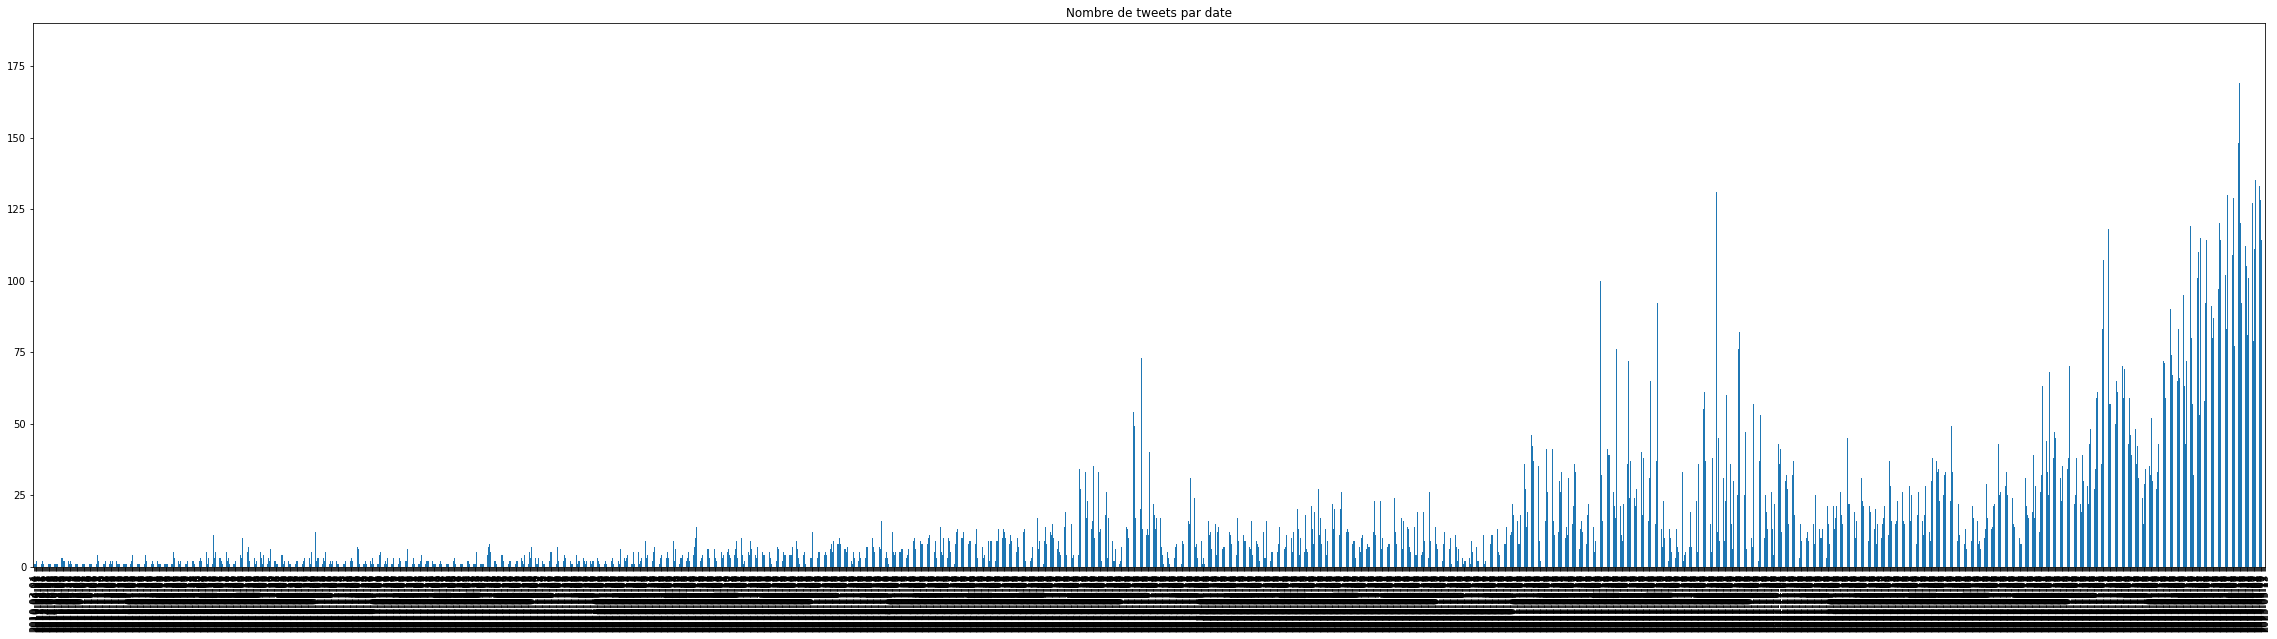

In [32]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
plt.figure()
ax = plt.gca()
df['Date'].value_counts().sort_index().plot(x='Date',kind='bar',figsize=(40,10),title='Nombre de tweets par date')
for label in ax.get_xaxis().get_ticklabels()[::1000]:
    label.set_visible(False)
plt.show

In [34]:
df['Hashtag']=[','.join(i) if isinstance(i,list) else i for i in df['Hashtag']]
allWords=''.join([twts for twts in df['Hashtag']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size = 199,collocations=False).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [35]:
stemmer = SnowballStemmer('english')
df['Stemmatisation'] = [" ".join([stemmer.stem(word) for word in doc.split()]) for doc in corpus2] 
lemmatizer = WordNetLemmatizer()
df['Lemmatisation'] = [" ".join([lemmatizer.lemmatize(mot) for mot in doc.split()]) for doc in corpus2]
english_stopwords_list = stopwords.words('english')
new_stopwords=['wa','rt','think','like','good','ha','e','x','b','u','g']
english_stopwords_list.extend(new_stopwords)
df['Lemmatisation'] = [' '.join([word for word in doc.split() if word not in english_stopwords_list]) for doc in df['Lemmatisation']]
df['Stemmatisation'] = [' '.join([word for word in doc.split() if word not in english_stopwords_list]) for doc in df['Stemmatisation']]

In [106]:
corpus_Lem2=[word_tokenize(doc) for doc in df['Lemmatisation']]
corpus_stm=[word_tokenize(doc) for doc in df['Stemmatisation']]
modele = Word2Vec(corpus_Lem2,vector_size=200,window=50,min_count=250)  #Vectorisation de nos mots lemmatiser 
trained=modele.wv
dataf=pd.DataFrame(trained.vectors,index=trained.key_to_index.keys())
dataf.head(20)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
crypto,0.124864,0.150417,0.047497,-0.010099,0.159922,-0.224858,-0.077743,0.092927,-0.115827,0.122528,...,0.245020,0.050727,0.042269,-0.003263,-0.128849,0.019519,-0.019564,-0.142092,0.006728,-0.106076
ethereum,0.083809,0.003180,0.011486,0.062859,0.198675,-0.284722,0.001516,-0.016461,0.145577,0.192411,...,0.080603,0.083596,0.044773,-0.252073,0.411133,0.285328,0.157156,-0.390854,-0.036900,-0.414362
one,-0.044484,0.191393,0.071138,0.090529,0.064852,0.061273,-0.049454,-0.024906,-0.173633,0.185536,...,0.251283,0.002566,-0.033061,0.035306,-0.016136,-0.019633,0.001019,-0.117316,0.108673,-0.071094
people,-0.046748,0.131278,0.153130,0.185102,-0.090737,0.159995,-0.043856,-0.100966,-0.246293,0.324112,...,0.277740,-0.025015,-0.115251,0.022391,-0.111785,-0.026947,0.009729,-0.145878,0.146300,0.006504
bitcoin,-0.005858,0.186209,0.276521,-0.017304,0.283804,-0.142883,-0.042761,0.003891,-0.024272,0.138655,...,0.179661,0.072255,0.056263,-0.066058,0.032871,0.175373,0.002050,-0.098379,0.198219,-0.157478
time,-0.067096,0.163546,0.179355,-0.018274,0.130067,-0.038657,-0.064422,0.065677,-0.166985,0.114728,...,0.323638,-0.005253,-0.047839,0.059552,-0.034519,-0.028437,-0.057641,-0.112466,0.052133,-0.050085
get,-0.092072,0.168295,0.116083,0.062187,0.023984,0.049750,-0.066939,-0.023613,-0.190211,0.153098,...,0.331918,0.003155,-0.080448,0.069798,-0.020814,-0.066125,-0.002297,-0.141202,0.054728,-0.001137
amp,0.168941,0.047348,0.088358,-0.099145,0.383116,-0.487154,-0.112588,0.074943,0.170335,0.024447,...,0.175115,0.163586,0.073512,-0.139546,0.116646,0.221403,0.017816,-0.237841,-0.034486,-0.335749
new,0.098420,0.049438,-0.060315,0.075485,0.117498,-0.251080,-0.005998,-0.000721,0.029899,0.207342,...,0.118673,0.057189,0.081142,-0.164232,0.288109,0.163153,0.105554,-0.372894,-0.094089,-0.365633
year,-0.051824,0.056777,0.184133,-0.236162,0.448764,-0.118829,0.058657,0.076950,-0.033648,-0.205433,...,0.563246,0.060260,-0.183983,0.232756,-0.044163,-0.162212,-0.120216,-0.051668,0.039575,-0.073606


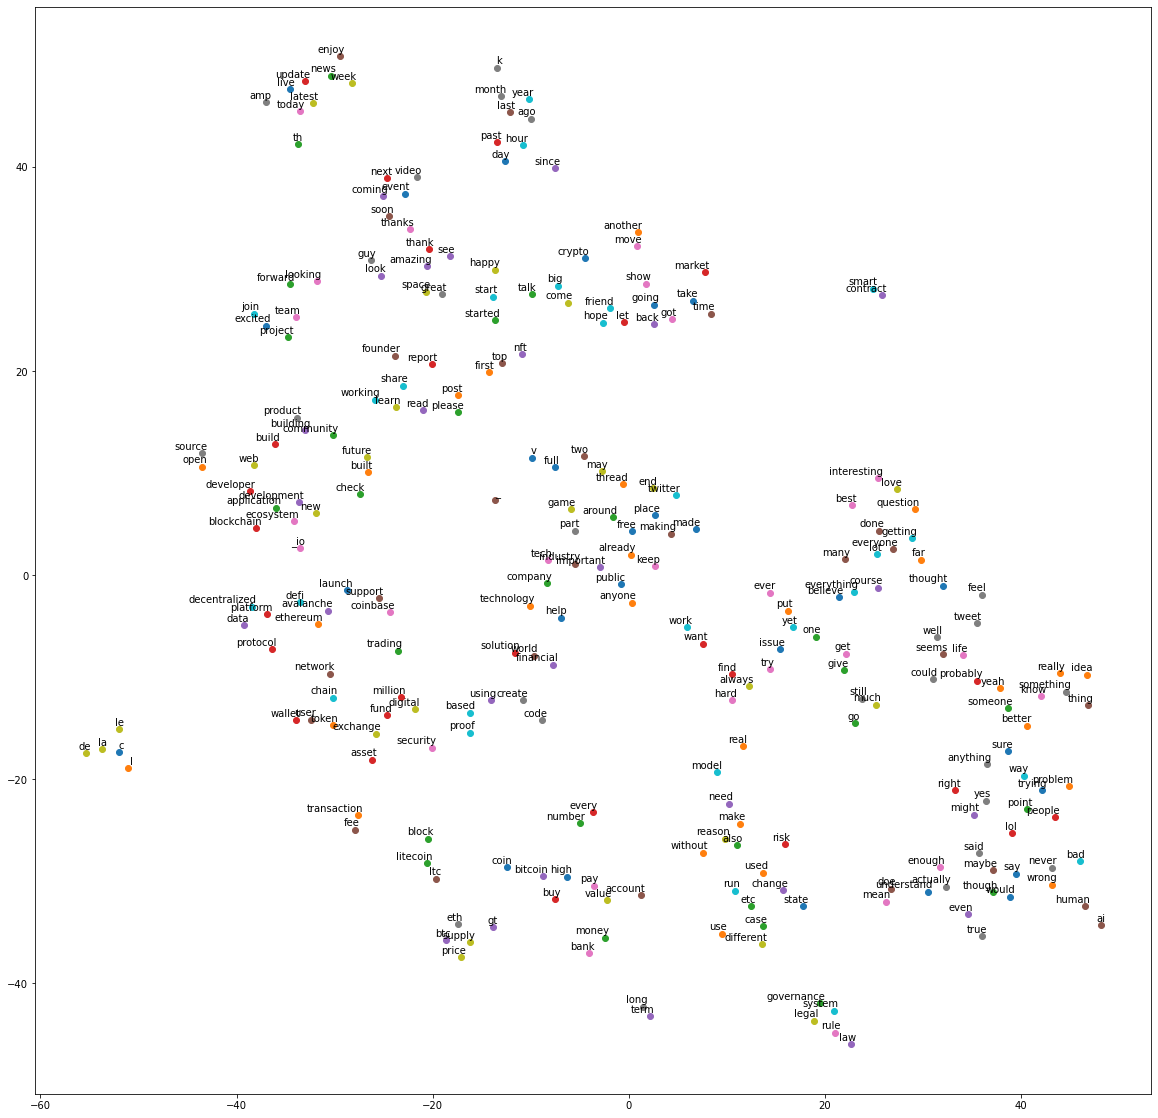

In [107]:
def tsne_plot(trained):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in trained.key_to_index:
        tokens.append(trained[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10, init='pca', n_iter=2500,random_state=40)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(trained)

In [38]:
corpus_Lem=[word_tokenize(doc) for doc in df['Lemmatisation']]

In [39]:
dictionary = gensim.corpora.Dictionary(corpus_Lem)   #Utiliser les corpus lemmatiser 
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=1000)   #Filtrer les mots qui apparaissent moins de 15 fois ou sont présents dans plus de 10% des documents.
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus_Lem]

In [84]:
tfidf=models.TfidfModel(bow_corpus)
corpus_tfidf=tfidf[bow_corpus]
lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics = 3, id2word = dictionary, passes = 10) 
topics = []
for idx, topic in lda_model.print_topics(-1) :
    print("Topic: {} -> Words: {}".format(idx, topic))
    topics.append(topic)

Topic: 0 -> Words: 0.015*"_" + 0.011*"le" + 0.010*"crypto" + 0.010*"great" + 0.009*"de" + 0.009*"going" + 0.008*"one" + 0.006*"looking" + 0.006*"world" + 0.006*"mate"
Topic: 1 -> Words: 0.017*"bitcoin" + 0.015*"ethereum" + 0.011*"amp" + 0.009*"new" + 0.008*"litecoin" + 0.008*"blockchain" + 0.007*"time" + 0.007*"live" + 0.007*"today" + 0.006*"yes"
Topic: 2 -> Words: 0.011*"people" + 0.008*"would" + 0.008*"get" + 0.008*"make" + 0.008*"thing" + 0.008*"way" + 0.008*"law" + 0.007*"really" + 0.007*"even" + 0.006*"lol"


In [85]:
all_topic_model = []
for i in range(len(topics)):
  str = topics[i].split(' + ')
  topic_model = []
  for j in range(10):
    weight = str[j][0:5]
    word = str[j][7:len(str[j])-1]
    topic_model.append((weight, word))
  all_topic_model.append(topic_model)

In [86]:
df_topic_model = pd.DataFrame(all_topic_model)
df_topic_model

,0,1,2,3,4,5,6,7,8,9
0,"(0.015, _)","(0.011, le)","(0.010, crypto)","(0.010, great)","(0.009, de)","(0.009, going)","(0.008, one)","(0.006, looking)","(0.006, world)","(0.006, mate)"
1,"(0.017, bitcoin)","(0.015, ethereum)","(0.011, amp)","(0.009, new)","(0.008, litecoin)","(0.008, blockchain)","(0.007, time)","(0.007, live)","(0.007, today)","(0.006, yes)"
2,"(0.011, people)","(0.008, would)","(0.008, get)","(0.008, make)","(0.008, thing)","(0.008, way)","(0.008, law)","(0.007, really)","(0.007, even)","(0.006, lol)"


df_topic_model.to_csv('/Users/famillediene/Documents/PYTHON_Test/Tweets21.csv',index=False)

In [87]:
doc_topics=lda_model.get_document_topics(corpus_tfidf)
print(doc_topics)

In [88]:
from gensim.matutils import corpus2csc
mat_sparse = corpus2csc(doc_topics)
print(mat_sparse)

  (0, 0)	0.1163998395204544
  (1, 0)	0.7094153761863708
  (2, 0)	0.17418476939201355
  (0, 1)	0.4304085671901703
  (1, 1)	0.3759773075580597
  (2, 1)	0.19361412525177002
  (0, 2)	0.2984616160392761
  (1, 2)	0.267985463142395
  (2, 2)	0.43355292081832886
  (0, 3)	0.4767574071884155
  (1, 3)	0.2651977241039276
  (2, 3)	0.25804486870765686
  (0, 4)	0.11959311366081238
  (1, 4)	0.3169723153114319
  (2, 4)	0.5634346008300781
  (0, 5)	0.3333333432674408
  (1, 5)	0.3333333432674408
  (2, 5)	0.3333333432674408
  (0, 6)	0.10507521778345108
  (1, 6)	0.10805660486221313
  (2, 6)	0.786868155002594
  (0, 7)	0.10144419968128204
  (1, 7)	0.3332212567329407
  (2, 7)	0.5653344988822937
  (0, 8)	0.6083179712295532
  :	:
  (2, 40576)	0.15471170842647552
  (0, 40577)	0.646572470664978
  (1, 40577)	0.20817537605762482
  (2, 40577)	0.14525213837623596
  (0, 40578)	0.1083395928144455
  (1, 40578)	0.1824510544538498
  (2, 40578)	0.7092093229293823
  (0, 40579)	0.5242745876312256
  (1, 40579)	0.342650860548019

In [89]:
mat_dt = mat_sparse.T.toarray()
print(mat_dt)

[[0.11639984 0.70941538 0.17418477]
 [0.43040857 0.37597731 0.19361413]
 [0.29846162 0.26798546 0.43355292]
 ...
 [0.14752932 0.70711017 0.14536048]
 [0.33333334 0.33333334 0.33333334]
 [0.32995027 0.09309793 0.5769518 ]]


In [90]:
all_topics_df = pd.DataFrame(mat_dt)
Data = df.join(all_topics_df)

In [91]:
all_topics_df.rename(columns = {0:'Bruit', 1:'Crypto',2:'Bruit'}, inplace = True)

In [92]:
cols_to_keep = all_topics_df.idxmax(axis=1)
max_cols_df = cols_to_keep.apply(lambda x: pd.Series([x]))
Data = df.join(max_cols_df)
Data.rename(columns = {0:'Category'}, inplace = True)
Data['Category']=Data['Category'].shift(1)
Data=Data.drop(df.index[[0]])

In [93]:
Data.head(20)

,Date,Username,tweets,Hashtags,Hashtag,Stemmatisation,Lemmatisation,Category
id,,,,,,,,
2,2023-05-12,ArthurB,_half_soul this has come up in design discussions my take is that it s worth shipping v without it since it s unlikely to have much consequences in the near term and getting override done in the next upgrade if adaptive is activated,[],,_half_soul come design discuss take worth ship v without sinc unlik much consequ near term get overrid done next upgrad adapt activ,_half_soul come design discussion take worth shipping v without since unlikely much consequence near term getting override done next upgrade adaptive activated,Bruit
3,2023-05-12,ArthurB,_half_soul there s a long overdue review of cycle invariants that will help clarify how many cycles we need to keep how many we need to wait for delegation to happen etc that should come first also if adaptive inflation is activated it also introduces a new type of possible override,[],,_half_soul long overdu review cycl invari help clarifi mani cycl need keep mani need wait deleg happen etc come first also adapt inflat activ also introduc new type possibl overrid,_half_soul long overdue review cycle invariant help clarify many cycle need keep many need wait delegation happen etc come first also adaptive inflation activated also introduces new type possible override,Bruit
4,2023-05-12,ArthurB,_half_soul it s a good idea but the best implementations would lengthen the voting cycle a bunch it s work to implement that s not going towards scaling latency reduction etc which are more likely to move the needle for the project tradeoffs,[],,_half_soul idea best implement would lengthen vote cycl bunch work implement go toward scale latenc reduct etc move needl project tradeoff,_half_soul idea best implementation would lengthen voting cycle bunch work implement going towards scaling latency reduction etc likely move needle project tradeoff,Bruit
5,2023-05-12,ArthurB,i do realize this but i find a lot of similarities between the tiktok video and this particular cover,[],,realiz find lot similar tiktok video particular cover,realize find lot similarity tiktok video particular cover,Bruit
6,2023-05-12,ArthurB,humm,[],,humm,humm,Bruit
7,2023-05-12,ArthurB,she s real though you can even buy action figures,[],,real though even buy action figur,real though even buy action figure,Bruit
8,2023-05-12,ArthurB,rt tezcollection fresh new wallet with tezos you also can make one for a friend find and collect art from around the world,[5tezCollection],,tezcollect fresh new wallet tezo also make one friend find collect art around world,tezcollection fresh new wallet tezos also make one friend find collect art around world,Bruit
9,2023-05-12,ArthurB,he s right tezos is a lesser chain less expensive less centralized less full of shit less congested less monolithic less brittle,[],,right tezo lesser chain less expens less central less full shit less congest less monolith less brittl,right tezos lesser chain le expensive le centralized le full shit le congested le monolithic le brittle,Bruit
10,2023-05-11,ArthurB,rt one more benefit of smart rollups being enshrined to a self upgradable blockchain protocol the smart rollup infra is also upgra,[],,one benefit smart rollup enshrin self upgrad blockchain protocol smart rollup infra also upgra,one benefit smart rollups enshrined self upgradable blockchain protocol smart rollup infra also upgra,Crypto


<function matplotlib.pyplot.show(close=None, block=None)>

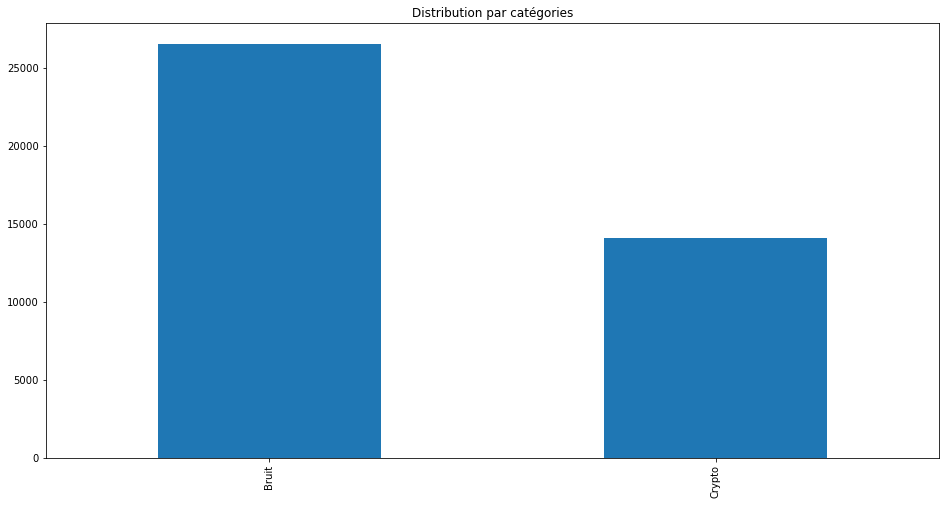

In [94]:
plt.figure()
Data['Category'].value_counts().plot(kind='bar',figsize=(16,8),title='Distribution par catégories')
plt.show

In [95]:
df_UE=Data[Data['Category'].str.contains('Crypto')]

<function matplotlib.pyplot.show(close=None, block=None)>

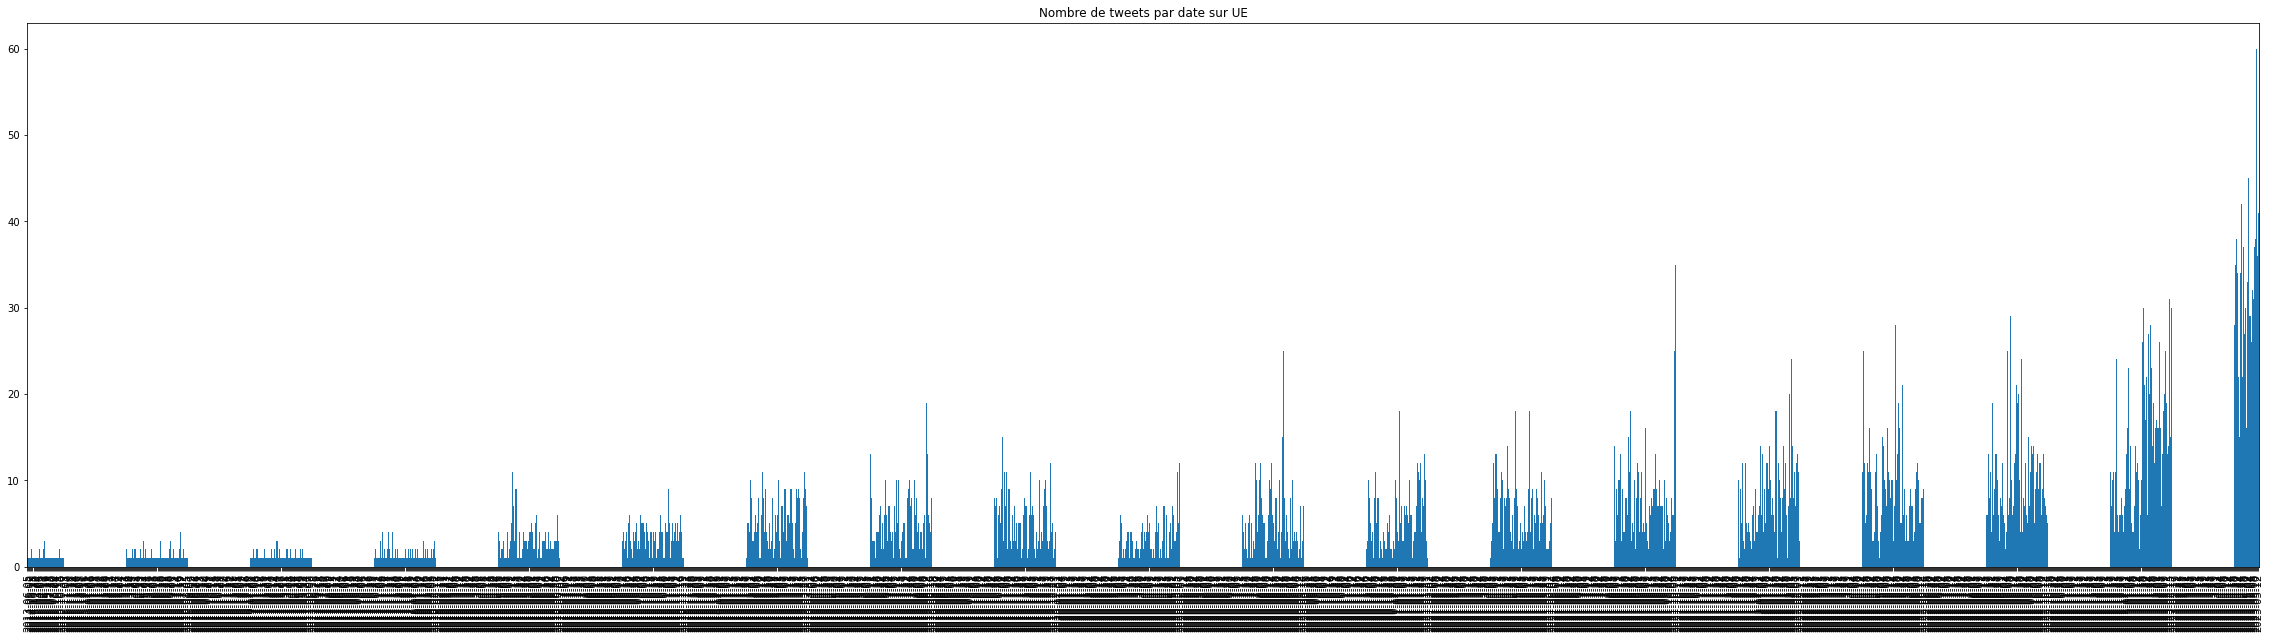

In [96]:
df_UE['Date'] = pd.to_datetime(df_UE['Date']).dt.date
plt.figure()
ax = plt.gca()
df_UE['Date'].value_counts().sort_index().plot(x='Date',kind='bar',figsize=(40,10),title='Nombre de tweets par date sur UE')
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.show

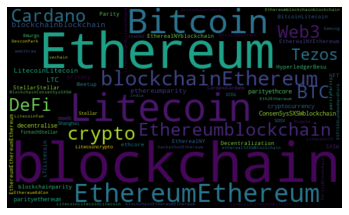

In [97]:
df_UE['Hashtags']=[','.join(i) if isinstance(i,list) else i for i in df_UE['Hashtags']]
allWords=''.join([twts for twts in df_UE['Hashtags']])
wordCloud = WordCloud(width=500, height=300, max_font_size = 199,collocations=False).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [98]:
df_UE

,Date,Username,tweets,Hashtags,Hashtag,Stemmatisation,Lemmatisation,Category
id,,,,,,,,
10,2023-05-11,ArthurB,rt one more benefit of smart rollups being enshrined to a self upgradable blockchain protocol the smart rollup infra is also upgra,,,one benefit smart rollup enshrin self upgrad blockchain protocol smart rollup infra also upgra,one benefit smart rollups enshrined self upgradable blockchain protocol smart rollup infra also upgra,Crypto
12,2023-05-11,ArthurB,rt today lambda cloud launched h instances we re the first and only cloud in the world to offer h s on demand gra,,,today lambda cloud launch h instanc first onli cloud world offer h demand gra,today lambda cloud launched h instance first cloud world offer h demand gra,Crypto
13,2023-05-10,ArthurB,rt iiii i pulsr officially supports tezosnfts now next gen artists collectors culture makers can discover nfts based on v,TezosNFTs,,iiii pulsr offici support tezosnft next gen artist collector cultur maker discov nfts base v,iiii pulsr officially support tezosnfts next gen artist collector culture maker discover nfts based v,Crypto
14,2023-05-10,ArthurB,rt calling all devs tezdev is back in paris this summer on july sign up now and be part of an exciting event packed w,TezDev,,call dev tezdev back pari summer juli sign part excit event pack w,calling devs tezdev back paris summer july sign part exciting event packed w,Crypto
30,2023-05-09,ArthurB,just doing our part to help the plight in all seriousness tezos has a fantastic community of users but with its scaling tech it has room for a lot more,,,part help plight serious tezo fantast communiti user scale tech room lot,part help plight seriousness tezos fantastic community user scaling tech room lot,Crypto
...,...,...,...,...,...,...,...,...
40574,2022-09-04,saylor,bitcoin mining improves your energy,"Bitcoin,Energy",,bitcoin mine improv energi,bitcoin mining improves energy,Crypto
40575,2022-09-04,saylor,waiting for bitcoin,Bitcoin,,wait bitcoin,waiting bitcoin,Crypto
40576,2022-09-03,saylor,if you want to be the digital monetary network for billion people you can t take weekends off bitcoin,Bitcoin,,want digit monetari network billion peopl take weekend bitcoin,want digital monetary network billion people take weekend bitcoin,Crypto


In [75]:

# Extraction des fréquences des mots
word_freq = wordCloud.words_

# Création du DataFrame à partir des fréquences des mots
words_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Tri du DataFrame par fréquence
words_df = words_df.sort_values(by='Frequency', ascending=False)

words_df= words_df.drop(columns='Frequency')
words_df['user'] =screen_name

# Vérification du DataFrame
words_df



,Word,user
0,blockchain,
1,Ethereum,
2,Bitcoin,
3,Litecoin,
4,DeFi,
...,...,...
97,仮想通貨仮想通貨,
98,セキュリティトークン,
99,STO,
101,ロシア,


In [ ]:
# Liste des noms d'utilisateur uniques
unique_users = df['user'].unique()

# Dictionnaire pour stocker les DataFrames de fréquence de mot pour chaque utilisateur
user_word_freq_dfs = {}

for user in unique_users:
    # Sélectionner les lignes pour l'utilisateur actuel
    user_df = df[df['user'] == user]
    
    # Concaténer tous les tweets de l'utilisateur en une seule chaîne
    allWords = ''.join(user_df['tweets'])
    
    # Générer le WordCloud
    wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=199, collocations=False).generate(allWords)
    
    # Extraction des fréquences des mots
    word_freq = wordCloud.words_
    
    # Création du DataFrame à partir des fréquences des mots
    words_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
    
    # Tri du DataFrame par fréquence
    words_df = words_df.sort_values(by='Frequency', ascending=False)
    
    # Suppression de la colonne 'Frequency'
    words_df = words_df.drop(columns='Frequency')
    
    # Ajout de la colonne 'user' avec le nom d'utilisateur actuel
    words_df['user'] = user
    
    # Ajout du DataFrame de fréquence de mot à notre dictionnaire
    user_word_freq_dfs[user] = words_df

# Concaténation de tous les DataFrames en un seul
all_users_df = pd.concat(user_word_freq_dfs.values(), ignore_index=True)

# Sauvegarder le DataFrame combiné en tant que JSON
all_users_df.to_json('all_users_word_freq.json', orient='records')


In [100]:
# Liste des noms d'utilisateur uniques
unique_users = df_UE['Username'].unique()

# Dictionnaire pour stocker les DataFrames de fréquence de mot pour chaque utilisateur
user_word_freq_dfs = {}

for user in unique_users:
    # Sélectionner les lignes pour l'utilisateur actuel
    user_df = df_UE[df_UE['Username'] == user]
    
    # Concaténer tous les tweets de l'utilisateur en une seule chaîne
    allWords = ''.join(user_df['tweets'])
    
    # Générer le WordCloud
    wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=199, collocations=False).generate(allWords)
    
    # Extraction des fréquences des mots
    word_freq = wordCloud.words_
    
    # Création du DataFrame à partir des fréquences des mots
    words_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
    
    # Tri du DataFrame par fréquence
    words_df = words_df.sort_values(by='Frequency', ascending=False)
    
    # Suppression de la colonne 'Frequency'
    words_df = words_df.drop(columns='Frequency')
    
    # Ajout de la colonne 'user' avec le nom d'utilisateur actuel
    words_df['user'] = user
    
    # Ajout du DataFrame de fréquence de mot à notre dictionnaire
    user_word_freq_dfs[user] = words_df

# Vérification des DataFrames
for user, words_df in user_word_freq_dfs.items():
    print(f"User: {user}")
    print(words_df)
    print("\n")

all_users_df = pd.concat(user_word_freq_dfs.values(), ignore_index=True)
all_users_df.to_json('all_users_word_freq2.json', orient='records')

User: ArthurB
         Word     user
0          rt  ArthurB
1       tezos  ArthurB
2           s  ArthurB
3           t  ArthurB
4         new  ArthurB
..        ...      ...
195   amazing  ArthurB
196     video  ArthurB
197       api  ArthurB
198     learn  ArthurB
199  anything  ArthurB

[200 rows x 2 columns]


User: VitalikButerin
          Word            user
0            s  VitalikButerin
1           rt  VitalikButerin
2     ethereum  VitalikButerin
3            t  VitalikButerin
4       people  VitalikButerin
..         ...             ...
160    funding  VitalikButerin
161  _dot_tech  VitalikButerin
162     _chain  VitalikButerin
163       apps  VitalikButerin
199          q  VitalikButerin

[200 rows x 2 columns]


User: cz_binance
        Word        user
0    binance  cz_binance
1         rt  cz_binance
2     crypto  cz_binance
3    project  cz_binance
4       team  cz_binance
..       ...         ...
91   _hansen  cz_binance
92      mica  cz_binance
93    effect  cz_binanc

pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)